<a href="https://colab.research.google.com/github/ShahZebYousafzai/Deep-Learning-Basics/blob/main/3_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting set of categories on observations.

There are three types of classification.
* **Binary Classification:** We have to predict that if something is one thing or another. The common example is email spam where we want to figure out whether the email we recieved is spam (where we do not want to see the email) or not spam (where we want to see the email). Another example is whether the person has a heart disease or not.
* **Multiclass Classification:** In this type of classification we want to if something is more than one thing or another. For example, if we have hundred different categories of food and we want to figure out which is a Pizza.
* **Multilabel Classification:** For example we have a wikipedia article and we want to predict in which category does the article belong to according to labels.

## Input and Ouputs

Following are the steps for our classification problem:
1. Numerical encode the inputs for example we have an image and convert the features to number.
2. Pass the input to machine learning algorithm and it will learn some features.
3. Predict the output.

**🤔 Now how will our inputs and output shapes will look like?**

The input tensor shape will look like `shape = [batch_size, width, height, color_channels]`.
If we have an RGB (color channels) image as an input, say 255x255 size, now the tensor shape will look something like this `shape = [32, 255, 255, 3]`.
We mentioned `32` in batchsize as it most common. `Batch size`, depending upon the size of data you may have and computing chip we are working in, means that to look 32 samples at one time so that it does not run out of memory.

The shape at the output will be `3` if we have 3 categories or classes.

But these shapes may vary depending on the problem you are working on.

## Architecture of Classification Neural Network

The basic architecture of the neural network consists of three things:
* Input layer
* Hidden layer
* Ouput layer

The model architecture can vary depending on the problem you are working on.

The standard values for neural network architecture that we will be using is shown in the table below.

<table>
  <tr>
    <th><font size="4">Hyperparameter</th>
    <th><font size="4">Binary Classification</th>
    <th><font size="4">Multiclass classification</th>
  </tr>
  <tr>
    <td align="center"><font size="3">Input layer shape</td>
    <td align="center"><font size="3">Same as number of features (e.g. 5 for age, sex, height, weight, smoking<br>status in heart disease prediction).</td>
    <td align="center"><font size="3">Same as binary classification</td>
  </tr>
    <tr>
    <td align="center"><font size="3">Hidden layer(s)</td>
    <td align="center"><font size="3">Problem specific, minimum = 1, maximum = unlimited</td>
    <td align="center"><font size="3">Same as binary classification</td>
  </tr>
  <tr>
    <td align="center"><font size="3">Neurons per hidden layer</td>
    <td align="center"><font size="3">Problem specific, generally 10 to 100</td>
    <td align="center"><font size="3">Same as binary classification</td>
  </tr>
  <tr>
    <td align="center"><font size="3">Output layer shape</strong></td>
    <td align="center"><font size="3">1 (one class or the other)</td>
    <td align="center"><font size="3">	1 per class (e.g. 3 for food, person or dog photo)</td>
  </tr>
  <tr>
    <td align="center"><font size="3">Hidden activation</strong></td>
    <td align="center"><font size="3">Usually <a href="https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning">ReLU</a> (rectified linear unit)</td>
    <td align="center"><font size="3">Same as binary classification</td>
  </tr>
  <tr>
    <td align="center"><font size="3">Output activation</strong></td>
    <td align="center"><font size="3"><a href="https://en.wikipedia.org/wiki/Sigmoid_function">Sigmoid</a></td>
    <td align="center"><font size="3"><a href="https://en.wikipedia.org/wiki/Softmax_function">Softmax</a></td>
  </tr>
  <tr>
    <td align="center"><font size="3">Loss function</strong></td>
    <td align="center"><font size="3"><a href="https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression">Cross entropy</a> (tf.keras.losses.BinaryCrossentropy in TensorFlow)</td>
    <td align="center"><font size="3">Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)</td>
  </tr>
  <tr>
    <td align="center"><font size="3">Optimizer</strong></td>
    <td align="center"><font size="3"><a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD">SGD</a> (stochastic gradient descent), <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam">Adam</a></td>
    <td align="center"><font size="3">Same as binary classification</td>
  </tr>
<table>

**📚 Source:** Tabel adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

Now we've looked at what classification is, it's time to code.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Here we have two label options 1 and 0, so this is a binary classification problem. But if we look at `X`, it does not make any sense. So what we will do is visualize our data.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Here we have two features, `X0` and `X1`, per label. Let's visualize it with a plot as it still not makes sense

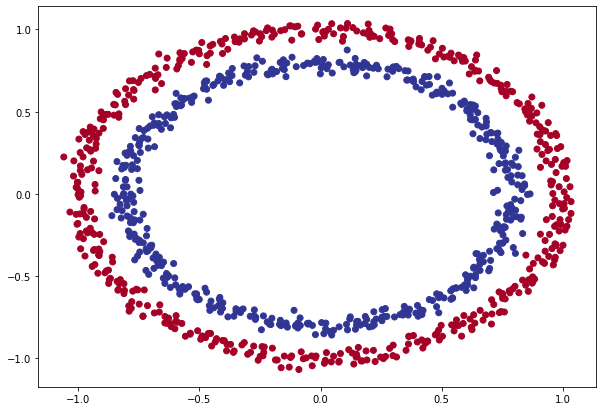

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Now we have a large circle (in red) and small circle (in blue). Now looking at the plot, what type of classification will this be? 🤔

It will be a `binary classification problem` as we have to see if something is one or another that is red or blue dots.

## Input and output shapes

In [6]:
# Firstly check the shapes of our feature and label
X.shape, y.shape

((1000, 2), (1000,))

`X` has 1000 samples and 2 features that is we have ((1000,2)) and `y` has 1000 samples and they are scalars that is why we don't have second dimension

In [7]:
# How many sample we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

Following the steps in modeling:
1. Building a model.
2. Compile the model.
3. Fit the model.
4. Evaluate the model.
5. Tweak.
6. Evaluate ...

Now what will will our output layer shape be? If you remember we said it is a binary classification, so output shape will be 1.

In [9]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


Out of 1000 examples, our model gives `48% accuracy`. This is not very good so let's improve it by training it for longer

In [11]:
model_1.fit(X,y, epochs=200, verbose=0)

In [12]:
# Evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

This is still not good as our model has only got `50% accuracy` and it is just guessing. Let's add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

😱 Despite adding an extra layer, we still got `50% accuracy` which means our model is working poorly.

## Improving our model

Let's check what we did to improve our model.

1. Adding layer. ✔️
2. Increase the number of hidden units. ❌
3. Change the activate function. ❌
4. Change the optimization function. ❌
5. Change the learning rate. ❌
6. Fitting more data. ❌
7. Training our model for longer. ✔️

All the points mentioned above are called `hyperparameters` which we can alter to improve the model.

So let's tune them.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add layer with 100 hidden units
                               tf.keras.layers.Dense(10),  # add layer with 100 hidden units
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,y, epochs=100, verbose=0)

In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

😭 We changed the hyperparameters and we still got `50% accuracy`. It's performing pretty poorly!

Let's visualize the predictions and plot them against our data and figure out what our model is trying to figuring out.

> **🔑 Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, let's make a plot function `plot_decision_boundary()`, this function will:

* Take in a trained model, feature (X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions acroos the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)


In [19]:
import numpy as np

In [84]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


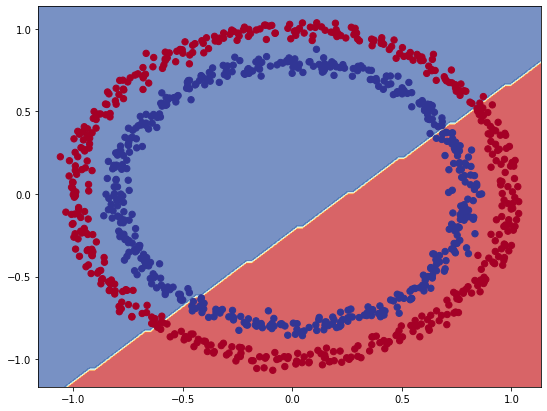

In [53]:
# Check out the predictions our model is maing
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

This is why our model is performing so poorly. It is drawing a straight line whereas our data is circular.

In [54]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X +100

# Spilit our regression data into training data and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

We compiled our model for binary classification problem. But ... now we are working on a regression problem, let's change the model to suit our data.

In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add layer with 100 hidden units
                               tf.keras.layers.Dense(10),  # add layer with 100 hidden units
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model with regression specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(X_reg_train,y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

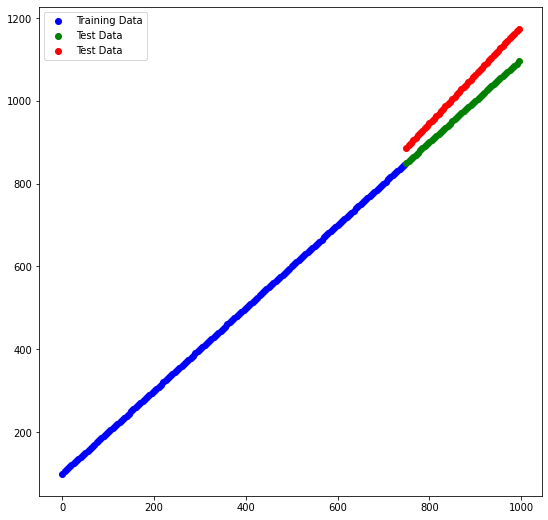

In [56]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(9,9))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Test Data")
plt.legend();

This means our model is working for our regression problem, but something is missing for our classification problem.

🤔 Why is this? Because our data is `linear` for regression and our classification data is `non-linear`.

## The missing piece: Non-linearity

In [57]:
# Set the random seed
tf.random.set_seed(42)

# 1, Create the model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile our model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

😱 Our model is performing worse then now. Let's remind ourselves how our data looks like

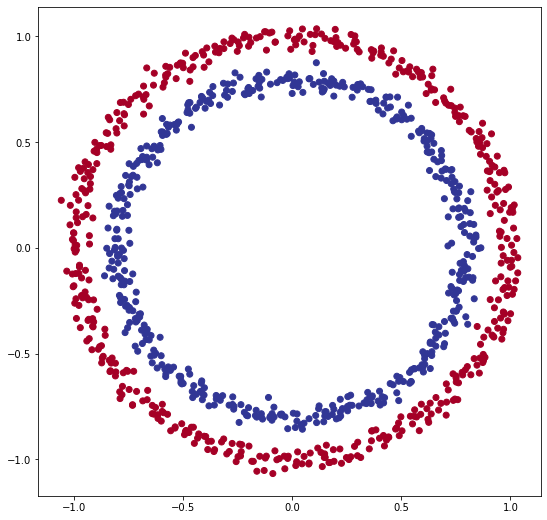

In [58]:
# Check out our data
plt.figure(figsize=(9,9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing binary classifcation...


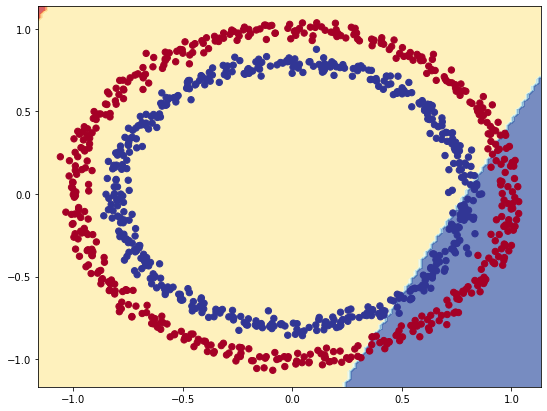

In [59]:
# Check the dicision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Oh my goodness! The plot says anything that is in yellow can be blue or red. It means our model is guessing. So, what can we do now?

Let's change the linear activation function to non-linear activation function.

To check our model, we can play around in [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true) to check the prediction.
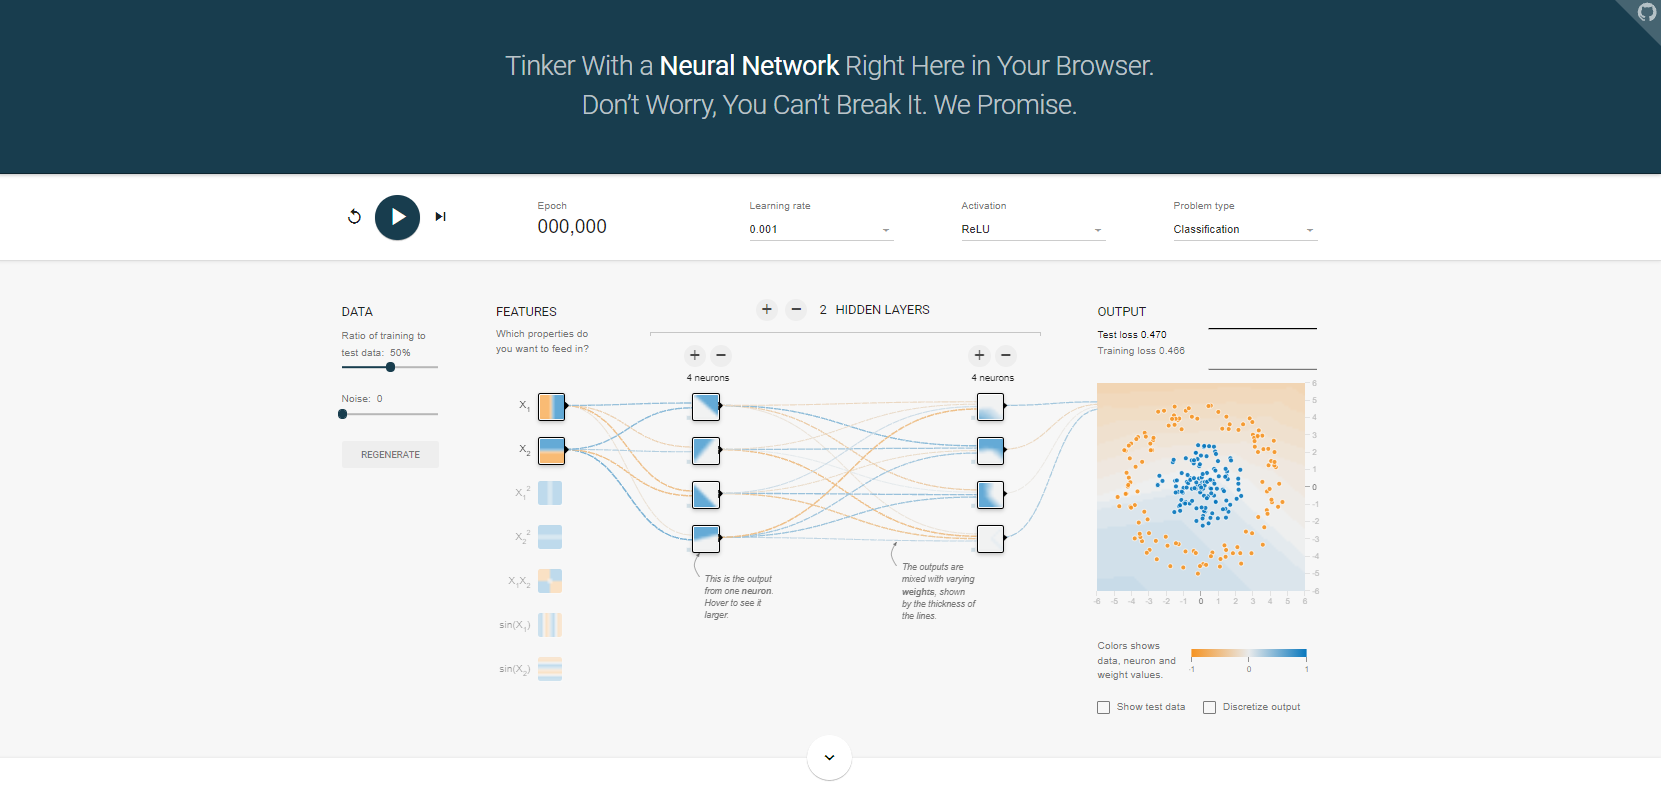

In [60]:
# Set the random seed
tf.random.set_seed(42)

# 1, Create the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile our model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

😒 It's worse than guessing.

Let's go back to our points of improving our model and check what we had done.
1. Adding layer. ✔️
2. Increase the number of hidden units. ✔️
3. Change the activate function. ✔️
4. Change the optimization function. ✔️
5. Change the learning rate. ✔️
6. Training our model for longer. ✔️

We did all of these. But ... what we have not done this in conjunction with eachother.

We played around in TensorFlow playground by making 2 hidden layer with 4 hidden units, setting the activation function to ReLU and a learning rate of 0.001. The results we found after 300 epochs were great.

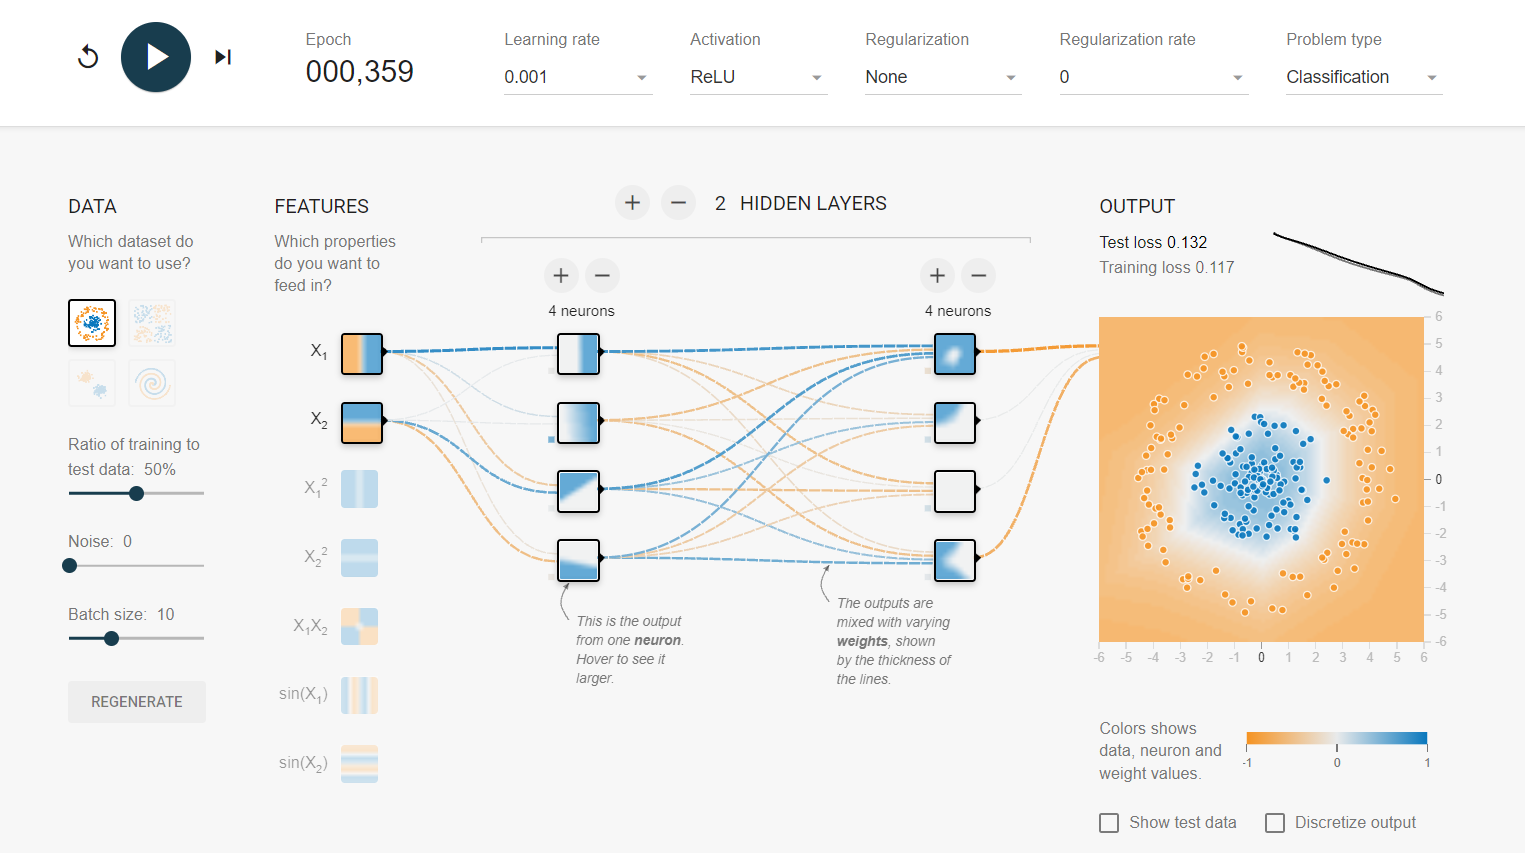

In [61]:
# Time to replicate the multi-layer neural network from Tensorflow playground in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"), # add layer with 4 hidden units
                               tf.keras.layers.Dense(4, activation="relu"),  # add layer with 4 hidden units
])

# 2. Compile the model with regression specific loss function
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 3.2091 - accuracy: 0.0010 
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 1.6530 - accuracy: 0.1220
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 1.5982 - accuracy: 0.1320
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 1.5331 - accuracy: 0.1440
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 1.4113 - accuracy: 0.1490
Epoch 11

doing multiclass classification...


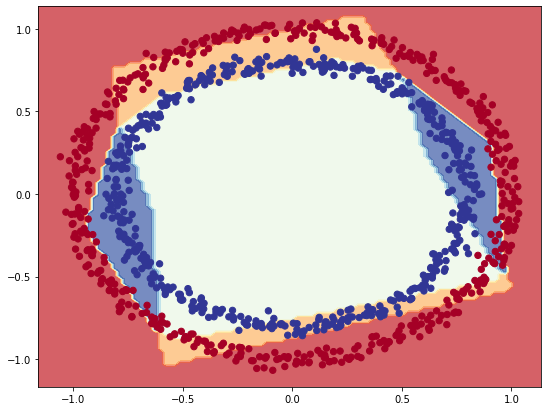

In [62]:
# Let's visualize what went wrong
plot_decision_boundary(model_7, X, y)

It's better then last time.

What should we do to improve it more? Let's refer to the table architecture at the start of the article. We should add another hidden layer with one hidden unit and sigmoid activation function.

In [63]:
# Time to replicate the multi-layer neural network from Tensorflow playground in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"), # add layer with 4 hidden units
                               tf.keras.layers.Dense(4, activation="relu"),  # add layer with 4 hidden units
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with regression specific loss function
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

🥳 Hooray! We finally got a good accuracy. But! Let's not just trust the accuracy.

In [64]:
# 4. Evaluate our model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


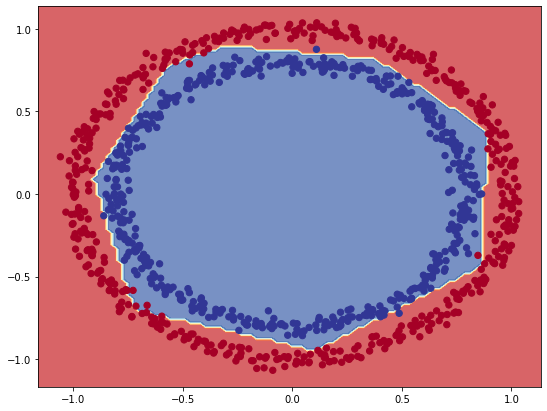

In [65]:
# Let's visualize our metrics
# Let's visualize what went wrong
plot_decision_boundary(model_8, X, y)

😆 It's so much better as there are two evenly distributed classes.

> **🤔 Question:** But what's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

> **🔑 Note:** The combination of **linear (straight lines)** and **non-linear (non-straight lines**) functions is one of the key fundamentals of neural networks

If we had an unlimited amount of straight lines (linear) and non-straight lines (non-linear), we could essentially draw any patterns we wanted to. That is what essentially our neural network is doing.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

### Sigmoid and ReLU Function

We have not discussed what these two functions do in our neural network. Here we will just dicuss that.

In [66]:
# Create a toy tensor (similar to data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

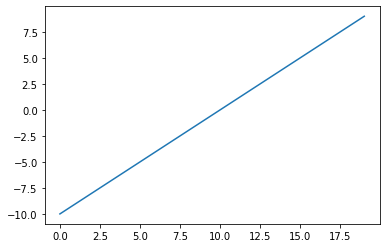

In [67]:
# Visualize our toy tensor
plt.plot(A)

Let's apply [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). The sigmoid function looks something like this:

sigmoid(x) = 1/(1+e^-x)

We will replicate this code and apply on our toy tensor.

In [68]:
# Let's make a sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use sigmoid function on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

It's better to plot these numbers to see how our sigmoid function looks like on our toy tensor.

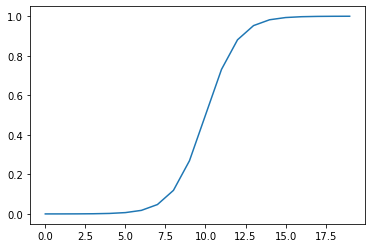

In [69]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

Our line was originally straight and is now modified to non-straight. Before, we were making patterns with straight lines in our neural network models and when we applied sigmoid function, it made non-straight line and found the patterns.

Let's look at what the [ReLU function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) does. 

In [70]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [71]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

All ReLU has done is it made negative values to zero. Let's plot how it look visually.

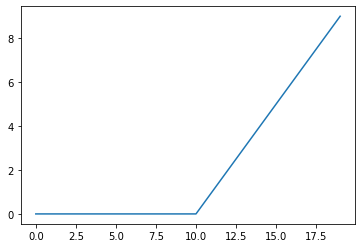

In [72]:
plt.plot(relu(A))

We can still argue that this is straight but there is a kink in it. When we used these tools in our neural network model, they started drawing patterns in our data. 

In [73]:
# Let's try a linear activation function and see what does it do
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

😒 Are you serious? It did not modify our data. But let's visualize.

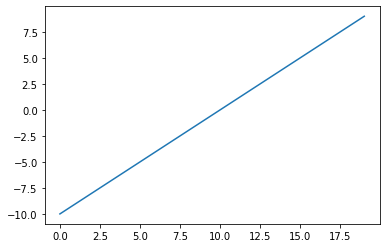

In [74]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [75]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

😅 So it does not change as all the values are True meaning the tensorflow documentation for linear function lives upto expectation.

So the main take away is that a neural network is a combination of linear activations and non-linear activations to find the patterns in our data.

> **📖 Resource:** For more on activation functions, check out the [machine learning cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#) page on them.

## Evaluating and improving our classification

Remember I asked a question? What was wrong with the prediction?

We evaluated the model on the same data we built/trained the model on. This is basically a sin. Our model will not be able to generalize.

In our steps, we need to train the model on training set and test the model on test set. But at the moment we don't have a training data or the test set.

Let's remind you of the three dataset.

* **training data**: The dataset on which our model needs to be trained on.
* **validation data:** The dataset on which we need to validate our model.
* **test data:** The dataset on which we need to test our model.

So let's create a training and test set.

In [76]:
# Check how many sample we have
len(X)

1000

In [77]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Now that we have split our data, how about we create a model, fit our training data and then evaluate it on the testing data. But let's set the learning rate to 0.01. The [learning rate](https://en.wikipedia.org/wiki/Learning_rate) tells the steps to take while learning the data. Lower the learning rate faster the model converges and decreasing it makes it slower but the learning will be higher.

In [78]:
# Time to replicate the multi-layer neural network from Tensorflow playground in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"), # add layer with 4 hidden units
                               tf.keras.layers.Dense(4, activation="relu"),  # add layer with 4 hidden units
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with regression specific loss function
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

Wow! We obtained `98% accuracy` at the end of the training but we need to evaluate to make sure.

In [79]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

Another Wow! We obtained a `100% accuracy` on our test data. The test data is the data our model has never seen before that means at every test value it got correct.

Now to really evaluate it, we should visualize it.

doing binary classifcation...
doing binary classifcation...


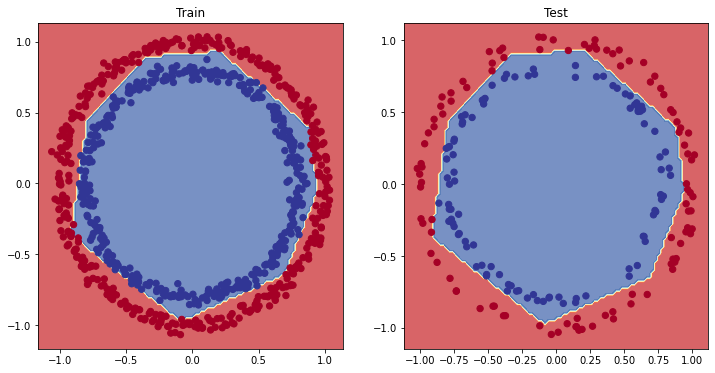

In [85]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

😱 Would you look at that! Our decision boundary, goes through the training data. Misses a few data but it's okay we don't have 100% in training. But in the testing data our model performs 100% perfectly

In [86]:
model_9.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curve

You have seen that whenever we fit the model, we asssigned it to the variable [history](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The reason is because we need to plot our model's learning curve. Let's give it a try.


In [87]:
# What does history.history give us according to the TF documentation? (Convert it to DataFrame)
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


It gives the accuracy at every epoch which is really beautiful.

Text(0.5, 1.0, 'Model_9 loss curve')

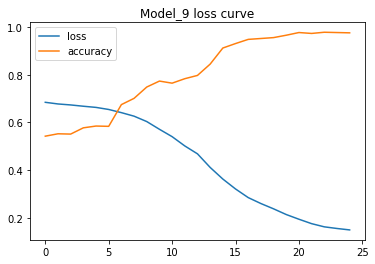

In [91]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curve")

> **🔑 Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate?
But how do we find the ideal learning rate to improve our model? To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **[callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)** - you can think of of callback as an extra piece of functionality , you can add to your *while* its training.
* Another model (we could use the same one as above)
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> **🔑 Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.


In [94]:
# Time to replicate the multi-layer neural network from Tensorflow playground in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_9)
model_10 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"), # add layer with 4 hidden units
                               tf.keras.layers.Dense(4, activation="relu"),  # add layer with 4 hidden units
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with regression specific loss function
model_10.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# 4. Fit the model (passing the lr_scheduler callback)
history = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

This is something similar to what we have done before but we have added `lr_scheduler`. Let's check what it does.

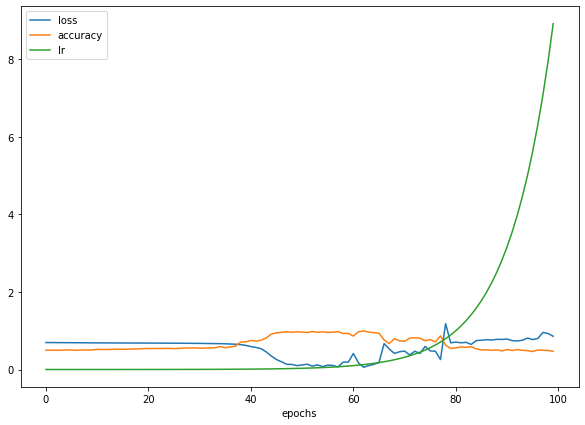

In [95]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

If we look at our Y-axis, our learning rate starts very low (alomost zero) and as epochs go on the curve increases. Our accuracy seems to increase of 35 epochs and gets low after 60 and loss gets significantly low after some 40 epochs and and increases after some 60 epochs. We can see that after some 40 epochs, let's say after 43, our loss seems to be decreases faster.

Let's plot the learning rate values v/s the loss.

Text(0.5, 1.0, 'Learning rate vs. Loss')

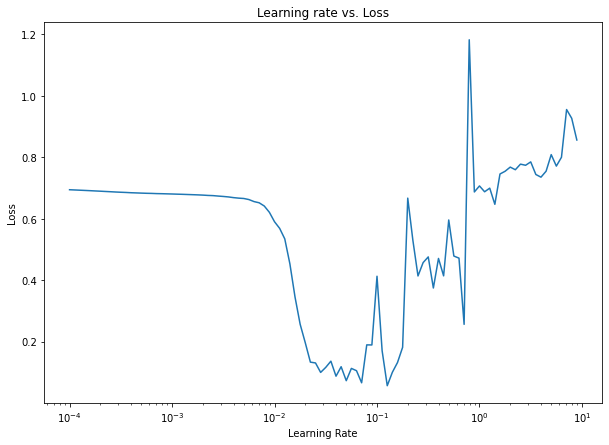

In [101]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 ($10^{-2}$) and 0.02.

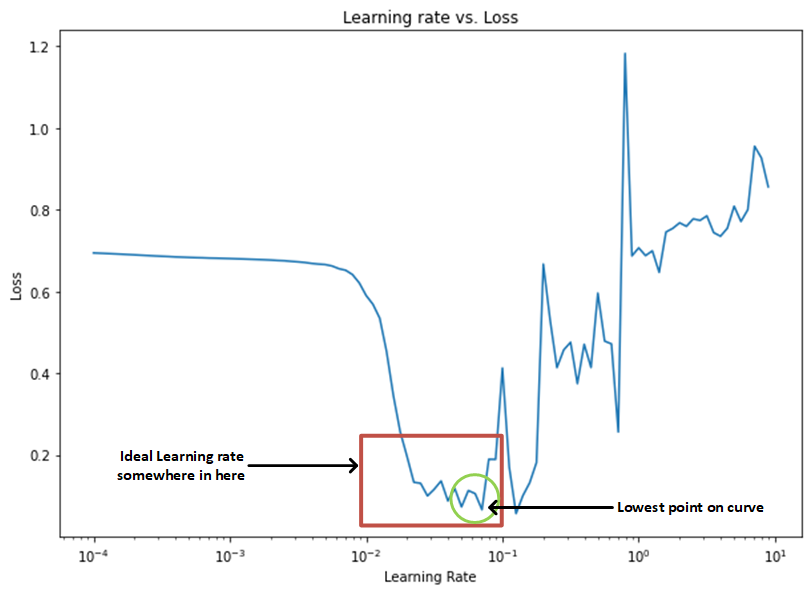

The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).

In [102]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Our learning rates can be any number.

🤔 But you might wondering why I highlighted the typical learning rates when it can be any number? The reason is whenever we use an optimizer, the default parameters are pretty good but they will not always work so we use the above examples.

Or we can train our network with learning rate schedulers and plot the graph and find our ideal learning rate where the loss curve decrease faster. In the above figure we have shown that the ideal learning rate with the lowest point.

Now, let's built a model and pick that learning rate.

In [103]:
# Time to replicate the multi-layer neural network from Tensorflow playground in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_9)
model_11 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"), # add layer with 4 hidden units
                               tf.keras.layers.Dense(4, activation="relu"),  # add layer with 4 hidden units
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model with regression specific loss function
model_11.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])


# 4. Fit the model (passing the lr_scheduler callback)
history = model_11.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

We obtained 98% accuracy and the loss is 7%. Our model has slightly improved than model_9 by adjusting the learning rate to 0.02. But it might not always happen so we will have to tune other hyperparameters.

Let's evaluate our model.

In [104]:
# Evaluate model 11 on the test dataset
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [106]:
# Evaluate model 8 on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

🤔 Hmmm model 9 has 100% accuracy than model 11 so it doesn't mean our model 11 will not perform better on the test data by using the best learning rate.

doing binary classifcation...
doing binary classifcation...


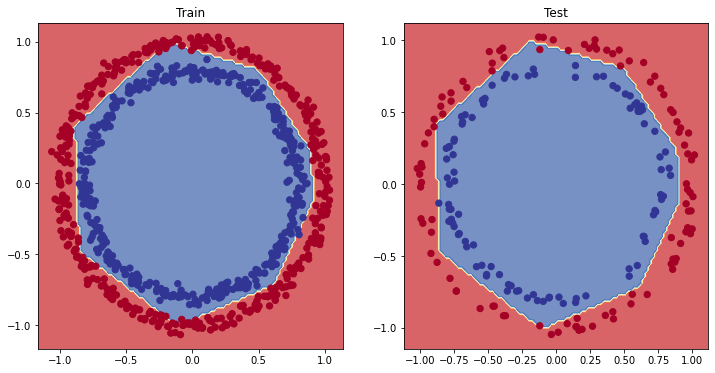

In [107]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show()

Our model 11 gets perfect predictions on the test dataset.

These are the kinds of experiments we'll be running to while building our models.

There are other classification evaluation methods and we'll have a look at them.

## Common Evaluation Methods

Alongside visualizing our model's results as much as possible there are different methods of classification evaluation which has been shown below.


<table>
  <tr>
    <th><font size="4">Metric name/<br>Evaluation method</th>
    <th><font size="4">Defintion</th>
    <th><font size="4">Code</th>
    <th><font size="4">When to use</th>
  </tr>
  <tr>
    <td align="center"><font size="3"><strong>Accuracy</strong></td>
    <td align="center"><font size="3">Out of 100 predictions, how many does your model get correct?<br>E.g. 95% accuracy means it gets<br>95/100 predictions correct.</td>
    <td align="center"><font size="3">sklearn.metrics.accuracy_score() or tf.keras.metrics.Accuracy()</td>
    <td align="center"><font size="3">Deafault metric for classification<br>
    problems. Not best for<br>imbalanced dataset</td>
  </tr>
    <tr>
    <td align="center"><font size="3"><strong>Precision</strong></td>
    <td align="center"><font size="3">Proportion of true positives over total number of samples.<br>Higher precision leads to less false positives<br>(model predicts 1 when it should've been 0).</td>
    <td align="center"><font size="3">sklearn.metrics.precision_score()<br>or<br>tf.keras.metrics.Precision()</td>
    <td align="center"><font size="3">Higher precision leads to less<br>positives</td>
  </tr>
  <tr>
    <td align="center"><font size="3"><strong>Recall</strong></td>
    <td align="center"><font size="3">Proportion of true positives over total number of true positives and <br>false negatives (model predicts 0 when it should've been 1).<br>Higher recall leads to less false negatives.</td>
    <td align="center"><font size="3">sklearn.metrics.recall_score()<br>or<br>tf.keras.metrics.Recall()</td>
    <td align="center"><font size="3">Higher recall leads to less false<>brnegatives</td>
  </tr>
  <tr>
    <td align="center"><font size="3"><strong>F1-score</strong></td>
    <td align="center"><font size="3">Combines precision and recall into one metric.<br>1 is best, 0 is worst.</td>
    <td align="center"><font size="3">sklearn.metrics.f1_score()</td>
    <td align="center"><font size="3">Combination of precision and recall,<br>usually a good overall metric for a<br>classification model.</td>
  </tr>
  <tr>
    <td align="center"><font size="3"><strong>Confusion matrix</strong></td>
    <td align="center"><font size="3">Compares the predicted values with the true values in a tabular way,<br>if 100% correct, all values in the matrix will be<br>top left to bottom right (diagnol line).</td>
    <td align="center"><font size="3">Custom function<br>or<br>sklearn.metrics.plot_confusion_matrix()</td>
    <td align="center"><font size="3">When comparing predictions to truth<br>labels to see where model gets<br>confused. Can be hard to use with<br>larger numbers of classes</td>
  </tr>
  <tr>
    <td align="center"><font size="3"><strong>Classification Report</strong></td>
    <td align="center"><font size="3">Compares the predicted values with the true values in a tabular way,<br>if 100% correct, all values in the matrix will be<br>top left to bottom right (diagnol line).</td>
    <td align="center"><font size="3">Custom function<br>or<br>sklearn.metrics.plot_confusion_matrix()</td>
    <td align="center"><font size="3">When comparing predictions to truth<br>labels to see where model gets<br>confused. Can be hard to use with<br>larger numbers of classes</td>
  </tr>
<table>

> **🔑 Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.



In [108]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


How about a confusion matrix?

## Confusion Matrix

### What is a confusion matrix?

It is a matrix of rows and columns. On the Y-axis we have the truth labels and on the X-axis we have what our model actually predicted. On the diagonal (in green) we have the correct predictions, otherwise:
* True Positives = model predicts 1 when truth is 1.
* True Negatives = model predicts 0 when truth is 0.
* False Positives = model predicts 0 when truth is 1.
* False Negatives = model predicts 1 when truth is 0.

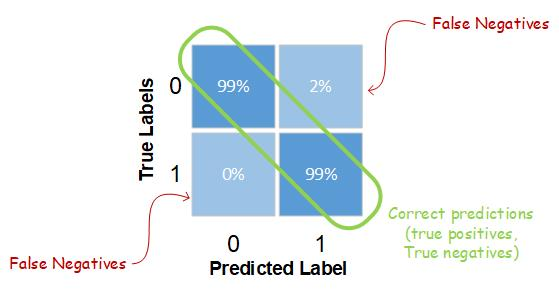


In [109]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [110]:
# Let's see where the problem is
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [111]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

Oops!!This is why we are having value error. Our test set is in binary form and preds is in continuous.